### 1. Importing Libraries

#### Here, we import the necessary libraries for data handling, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

### 2. Downloading Data from Yahoo Finance

#### We define the start and end dates for the past 20 years and download the stock data for Google using yfinance.

In [2]:
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


### 3. Data Overview

#### We take a look at the first few rows, shape, descriptive statistics, data types, and check for missing values in the dataset.

In [3]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [9]:
google_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-28,185.720001,186.580002,183.324997,183.419998,183.419998,23032400
2024-07-01,184.479996,185.339996,182.729996,184.490005,184.490005,11815900
2024-07-02,183.470001,186.949997,183.059998,186.610001,186.610001,12555500
2024-07-03,186.300003,187.619995,185.384995,187.389999,187.389999,7409100
2024-07-05,187.320007,192.259995,187.320007,191.960007,191.960007,14290500


In [4]:
google_data.shape

(5003, 6)

In [5]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5003.000000,5003.000000,5003.000000,5003.000000,5003.000000,5.003000e+03
mean,44.784831,45.258941,44.339789,44.811780,44.761588,1.160887e+08
std,42.663295,43.141294,42.252898,42.714682,42.668524,1.499372e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,12.998030,13.136511,12.860545,13.007868,12.993083,2.745900e+07
50%,26.956989,27.146000,26.756540,26.963499,26.932850,5.667000e+07
75%,59.925749,60.407749,59.481501,60.064501,59.996229,1.430442e+08
max,187.320007,192.259995,187.320007,191.960007,191.960007,1.650833e+09


In [6]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5003 entries, 2004-08-19 to 2024-07-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5003 non-null   float64
 1   High       5003 non-null   float64
 2   Low        5003 non-null   float64
 3   Close      5003 non-null   float64
 4   Adj Close  5003 non-null   float64
 5   Volume     5003 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 273.6 KB


In [7]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 4. Visualizing Adjusted Close Prices

#### We plot the adjusted closing prices to visualize the data trend over time.

Text(0.5, 1.0, 'Closing price of Google data')

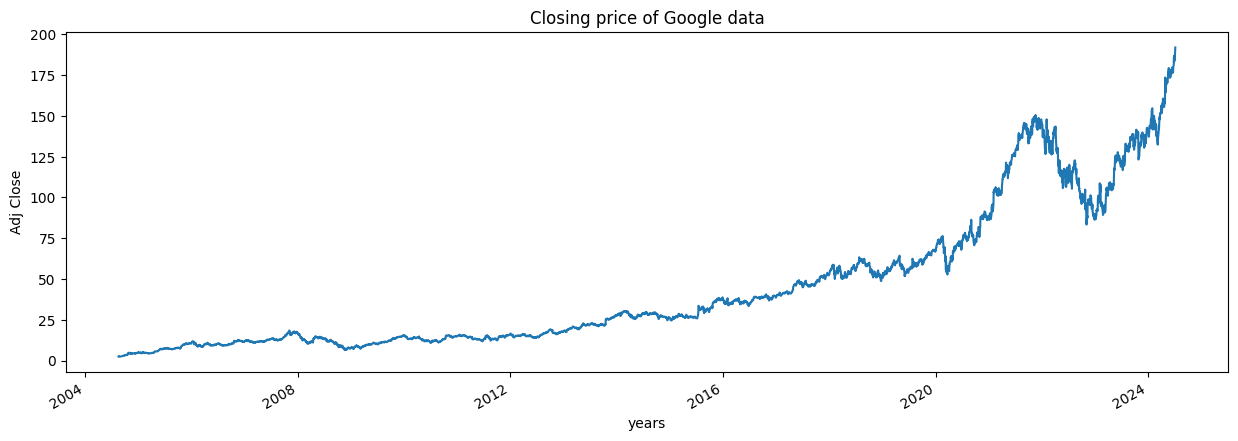

In [8]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

### 5. Function to Plot Columns

#### We define a function plot_graph to plot any column from the data. We then use this function to plot all columns.

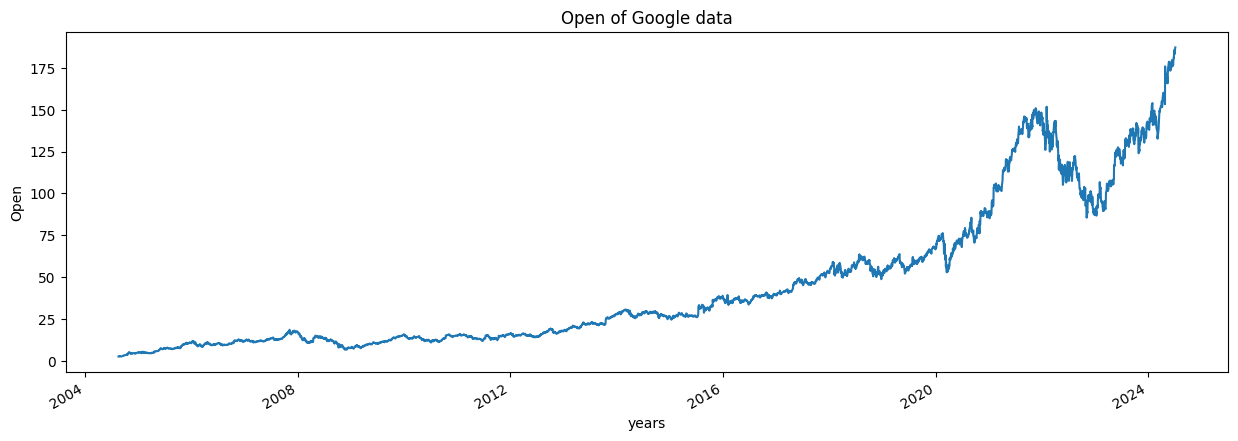

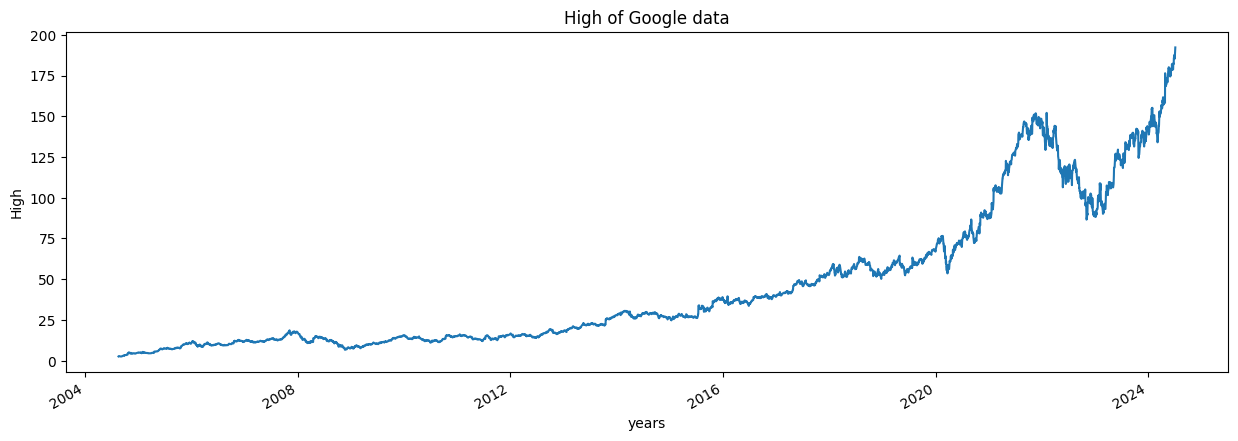

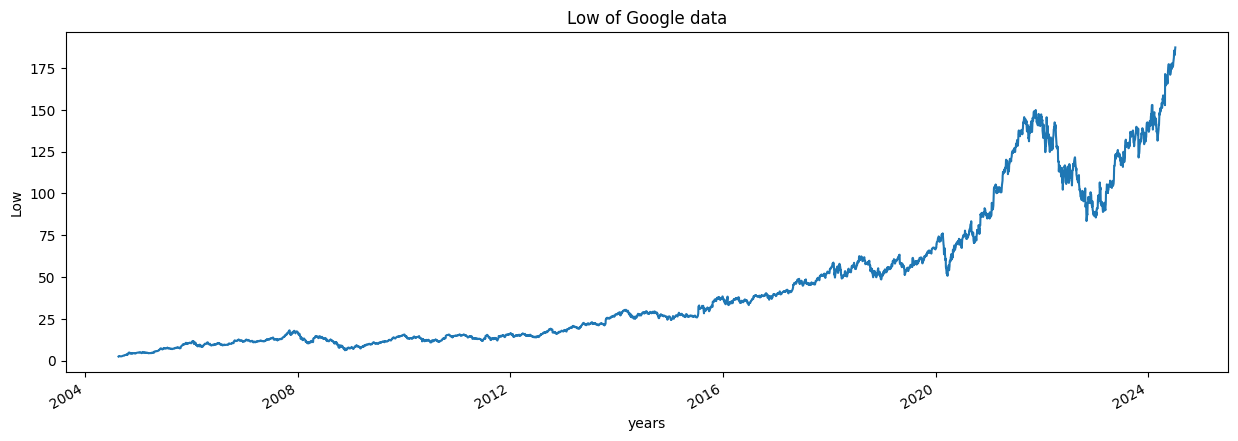

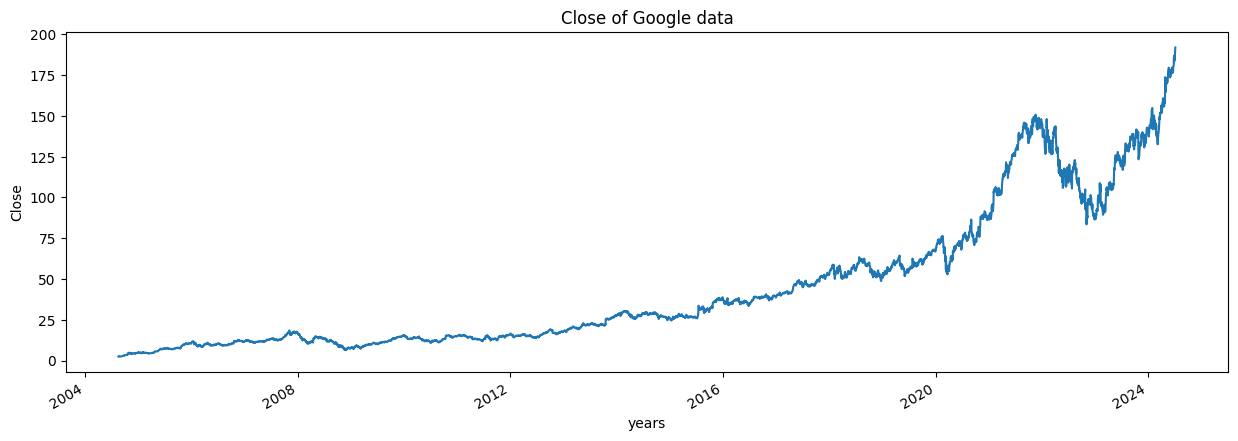

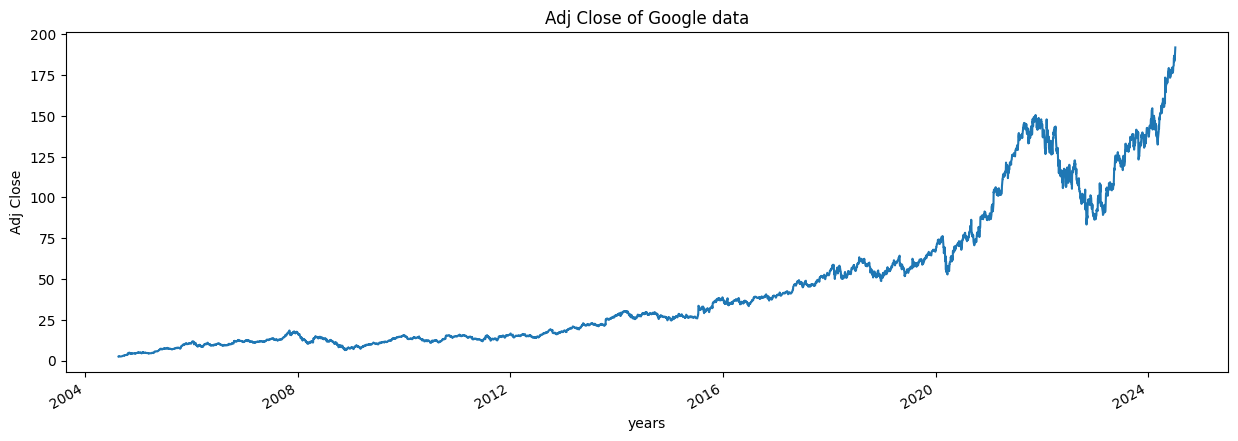

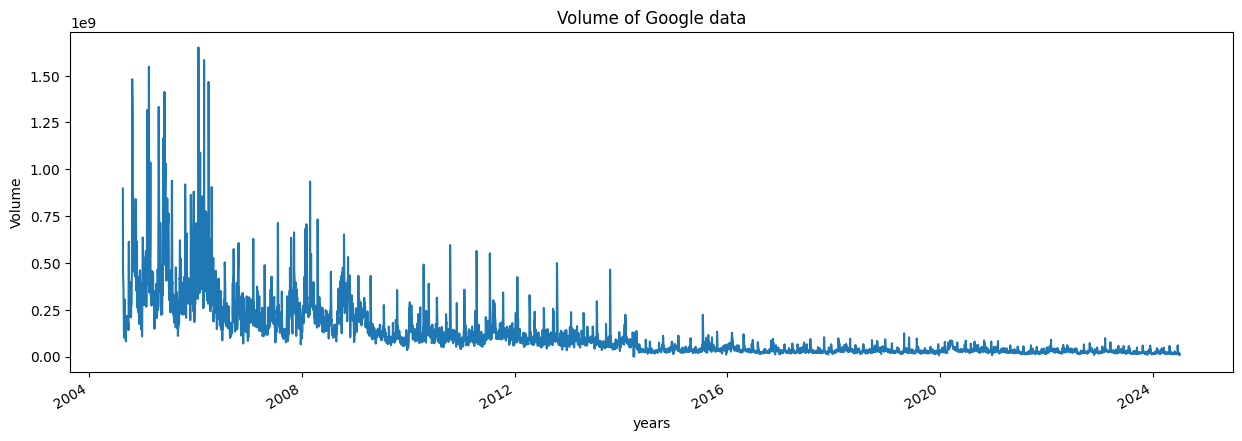

In [10]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    
google_data.columns
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

### 6. Moving Average Calculation

#### We calculate the moving averages for 100 and 250 days and plot them alongside the adjusted closing prices.

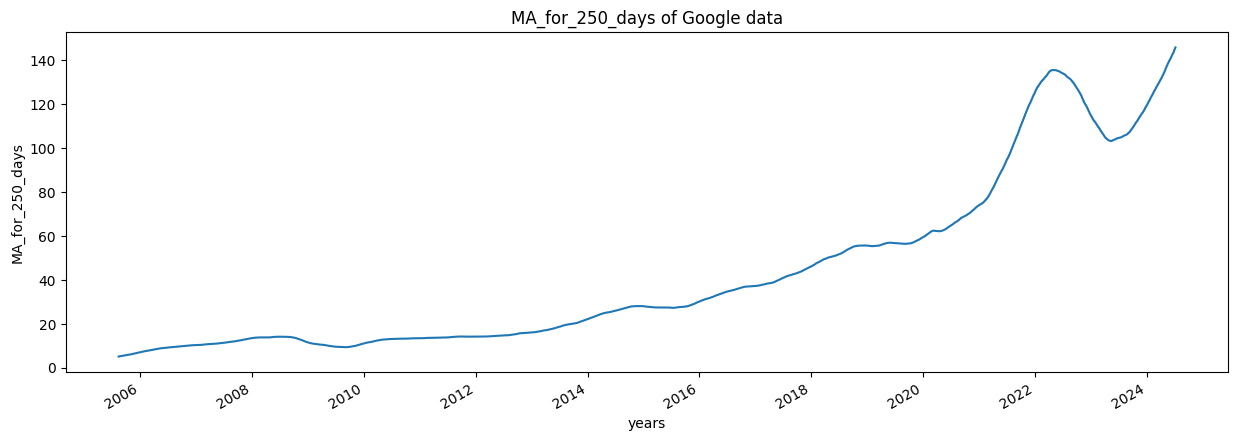

In [11]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

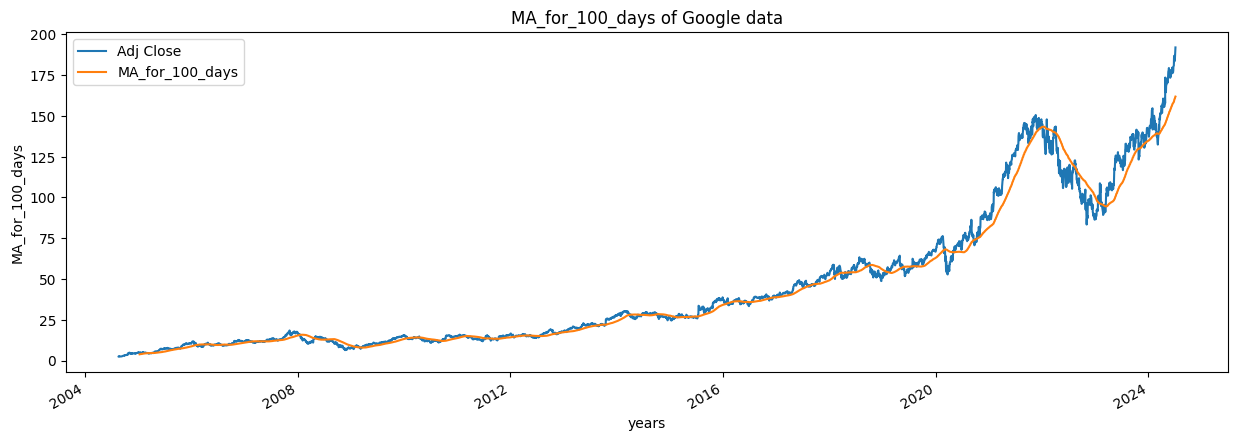

In [12]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

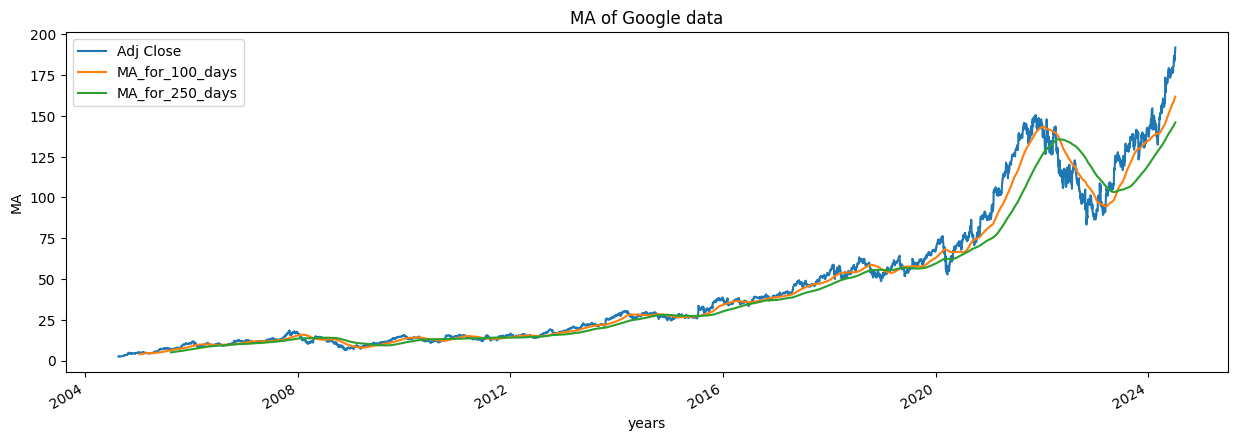

In [13]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

### 7. Percentage Change Calculation

#### We calculate and plot the percentage change in adjusted closing prices.

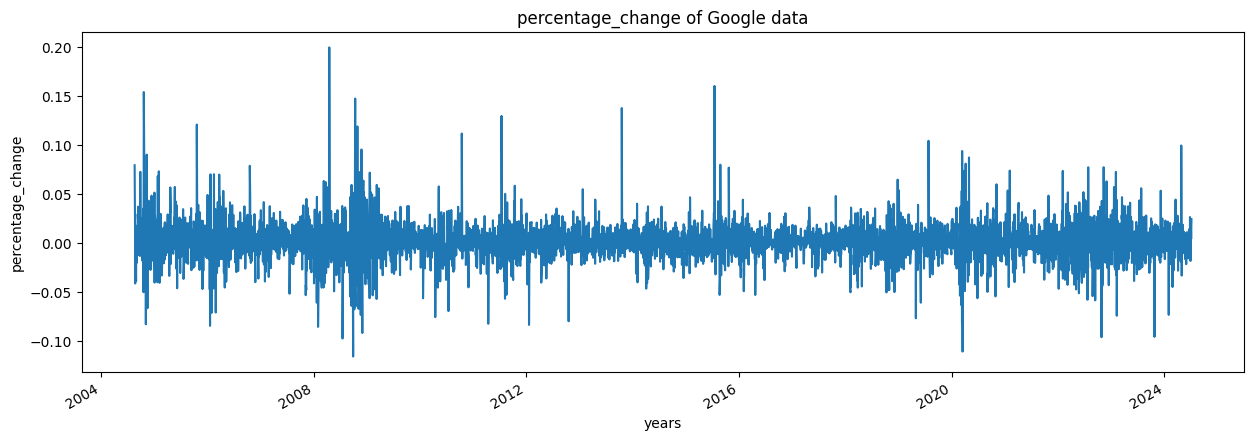

In [14]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

### 8. Data Scaling

#### We extract the adjusted closing prices and scale them using MinMaxScaler to prepare for model training.

In [15]:
Adj_close_price = google_data[['Adj Close']]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)

### 9. Creating Training and Testing Data

#### We create sequences of 100 days of data to predict the next day’s value. The data is then split into training and testing sets (70%-30% split).

In [16]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
x_data, y_data = np.array(x_data), np.array(y_data)

splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

### 10. Building and Training the LSTM Model

#### We define an LSTM model with two LSTM layers and two dense layers, compile it with the Adam optimizer, and train it on the training data.

In [17]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=2)
model.summary()

d:\Data Science\Certification in Data Science\stockMarketPredictionApp\yfinanceDashboard\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 125s 35ms/step - loss: 2.6228e-04
Epoch 2/2
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 111s 32ms/step - loss: 4.9477e-05


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

### 11. Making Predictions and Inverse Transforming

#### We make predictions on the test set and inverse transform the predictions and actual values back to the original scale.

In [18]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


### 12. Calculating RMSE

#### We calculate the Root Mean Square Error (RMSE) to evaluate the model's performance.

In [19]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

### 13. Visualizing Predictions

#### We plot the original test data and predictions to visually compare them.

<Figure size 640x480 with 0 Axes>

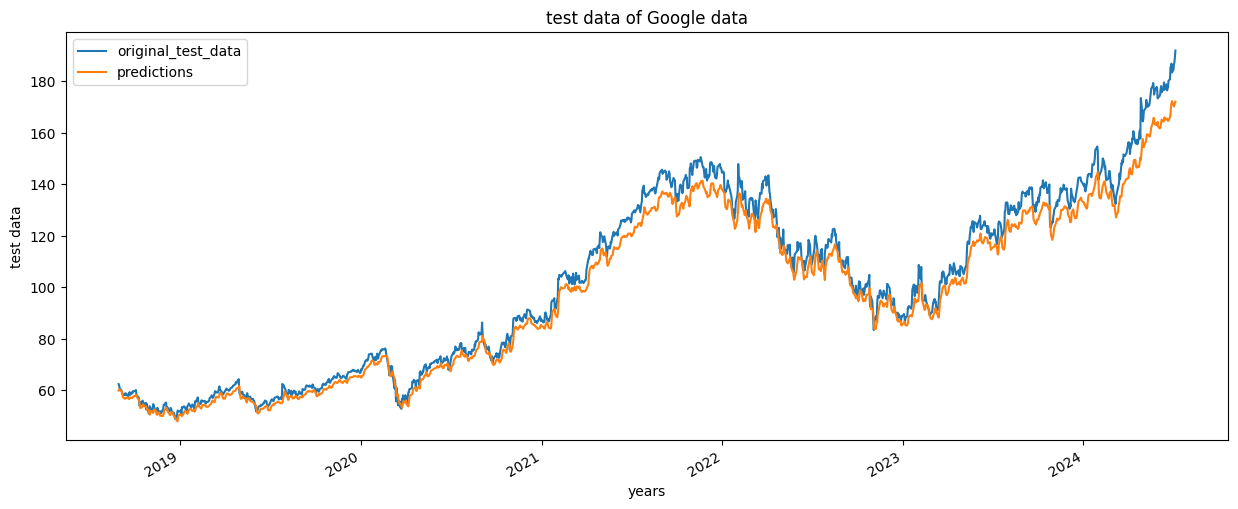

<Figure size 640x480 with 0 Axes>

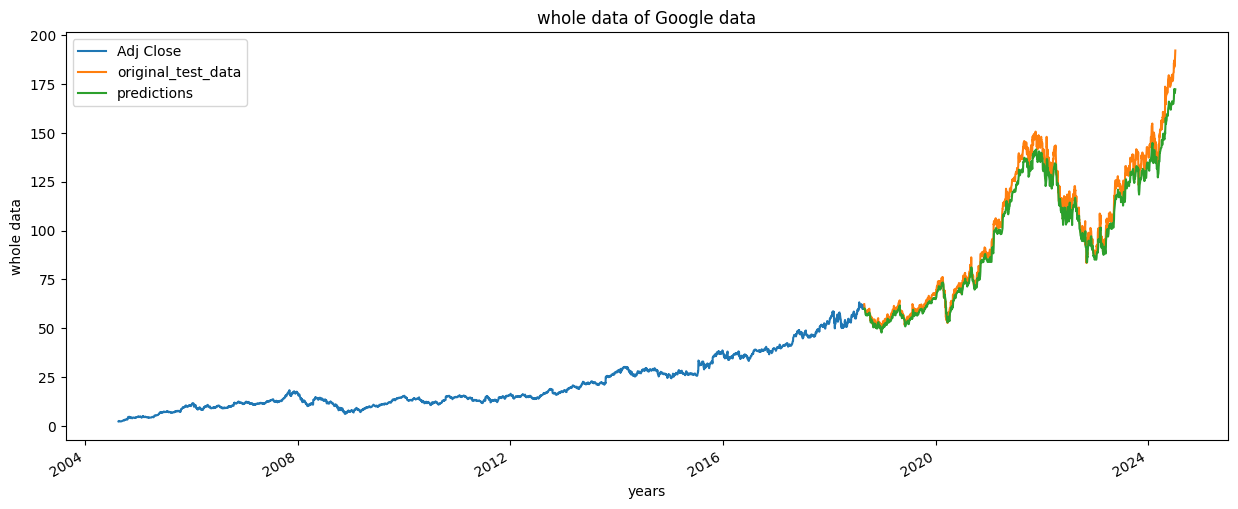

In [20]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
plot_graph((15,6), ploting_data, 'test data')
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

### 14. Saving the Model

#### Finally, we save the trained model for future use.

In [21]:
model.save("stock_price_model.keras")